# CIFAR-10 Dataset

Importing necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#To ignore Warnings

import warnings             
warnings.filterwarnings('ignore')

In [2]:
# Function to unpickle data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [5]:
# Load data from batch 2

data_batch2 = unpickle('data_batch_2')

In [6]:
type(data_batch2)   #checking datatype of file

dict

In [7]:
len(data_batch2)   #checking length of data_batch5

4

In [8]:
data_batch3[b'data'].shape    #Check the shape of the image data

(10000, 3072)

In [9]:
data_batch2[b'data'][0]      

array([ 35,  27,  25, ..., 169, 168, 168], dtype=uint8)

In [10]:
image=data_batch2[b'data'][0]      #Extract and reshape the image data
image=image.reshape(3,32,32)
image

array([[[ 35,  27,  25, ..., 132, 133, 126],
        [ 63,  32,  17, ..., 102, 105, 100],
        [ 99,  49,  15, ...,  46,  52,  52],
        ...,
        [166, 164, 164, ..., 173, 170, 167],
        [169, 169, 168, ..., 172, 168, 165],
        [173, 175, 173, ..., 170, 168, 166]],

       [[ 25,  21,  20, ..., 129, 121, 115],
        [ 55,  27,  13, ...,  95,  89,  86],
        [ 91,  45,  12, ...,  43,  41,  44],
        ...,
        [165, 163, 164, ..., 172, 170, 167],
        [168, 168, 168, ..., 171, 167, 165],
        [172, 174, 173, ..., 168, 167, 166]],

       [[ 26,  21,  19, ..., 129, 116, 113],
        [ 50,  21,   8, ...,  88,  76,  77],
        [ 84,  37,   5, ...,  39,  34,  41],
        ...,
        [171, 166, 165, ..., 170, 168, 167],
        [176, 173, 171, ..., 170, 167, 166],
        [179, 178, 175, ..., 169, 168, 168]]], dtype=uint8)

In [11]:
# Reshape the entire dataset and transpose dimensions

data=data_batch2[b'data']
labels = data_batch2[b'labels']
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)

#Display the Shape of the reshaped data

print(data.shape)    


(10000, 32, 32, 3)


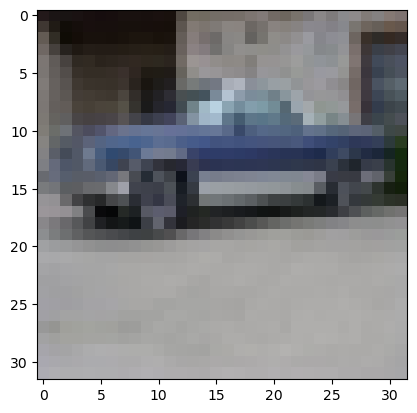

In [12]:
plt.imshow(data[0])  # Display the first image

In [13]:
batch_no=2

In [14]:
data_list=[]

In [15]:
# Create a list for data in the desired format for a DataFrame

for i in range(len(data)):
    d1=data[i].flatten()
    labels = data_batch2[b'labels']
    
    label= labels[i] #Extract the label (assuming it's a 1D array)
    
    data_list.append([label]+list(d1))
    

In [16]:
labels = data_batch2[b'labels']   # Creating a list of labels
#print(labels)

In [17]:
# Define column names for the DataFrame

column1=['label']+[f'Pixel_{i}' for i in range(len(data_list[0])-1)]

In [18]:
df=pd.DataFrame(data_list,columns=column1)   # Create a DataFrame

In [19]:
df.shape      #Shape of the DataFrame

(10000, 3073)

In [20]:
# Save the DataFrame to a CSV file

csv_filename = f'cifar10_batch_{batch_no}.csv'
df.to_csv("Batch2.csv", index=False)

In [21]:
df.head(5)   #Display the shape and the first 5 rows of the DataFrame

,label,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_3062,Pixel_3063,Pixel_3064,Pixel_3065,Pixel_3066,Pixel_3067,Pixel_3068,Pixel_3069,Pixel_3070,Pixel_3071
0,1,35,25,26,27,21,21,25,20,19,...,-87,-86,-88,-87,-88,-89,-88,-90,-90,-88
1,6,20,15,12,20,15,12,18,13,10,...,66,-101,-99,111,-120,-119,97,88,89,51
2,6,116,103,56,115,105,59,-101,-128,82,...,5,52,37,18,124,110,84,-101,-112,124
3,8,98,90,81,91,83,71,82,75,61,...,120,73,101,125,78,105,-124,82,109,-118
4,8,85,103,-118,102,121,-100,109,127,-93,...,71,8,23,64,7,20,65,8,19,66


In [22]:
df.ndim    #Check dimensionality of data frame

2